# Linear Regression Assignment - Sannan Dabir

### Importing the libraries

In [223]:
import numpy as np
import pandas as pd

### Importing the warnings

In [224]:
import warnings
warnings.filterwarnings('ignore')

### Importing the visualization libraries

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the dataset

In [226]:
data=pd.read_csv('day.csv')

In [227]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Checking various data information

In [228]:
data.shape

(730, 16)

In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [230]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### *No column of the above dataset has null values*

In [231]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Checking if there are duplicate rows in the dataset

In [232]:
duplicate_data=data
duplicate_data.drop_duplicates(subset=None,inplace=None)
duplicate_data.shape

(730, 16)

#### *No duplicate rows are present in the above data*

### Converting the categorical numerical values into categorical string values

In [233]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Replacing the season values

In [234]:
data.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [235]:

data.season.replace((1,2,3,4),('spring','summer','fall','winter'),inplace=True)
data.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

#### Replacing the month values

In [236]:
data.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [237]:
data.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'),inplace=True)
data.mnth.value_counts()

Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64

#### Replacing the weekday values

In [238]:
data.weekday.value_counts()

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64

In [239]:
data.weekday.replace((0,1,2,3,4,5,6),('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'),inplace=True)
data.weekday.value_counts()

Monday       105
Tuesday      105
Wednesday    104
Thursday     104
Friday       104
Saturday     104
Sunday       104
Name: weekday, dtype: int64

#### Replacing the weathersit values

In [240]:
data.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [241]:
data.weathersit.replace((1,2,3,4),('Clear','Misty','Light_Snow&Rain','Heavy_Snow&Rain'),inplace=True)
data.weathersit.value_counts()

Clear              463
Misty              246
Light_Snow&Rain     21
Name: weathersit, dtype: int64

In [242]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Monday,1,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tuesday,1,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Analyzing Categorical Column

In [243]:
def boxplot_cat_col(cat_var):
    plt.figure(figsize=(20,10))
    for i in range(0,len(cat_var)):
        plt.subplot(2,3,i+1)
        sns.boxplot(x=cat_var[i],y=data.cnt,data=data)
    plt.show()

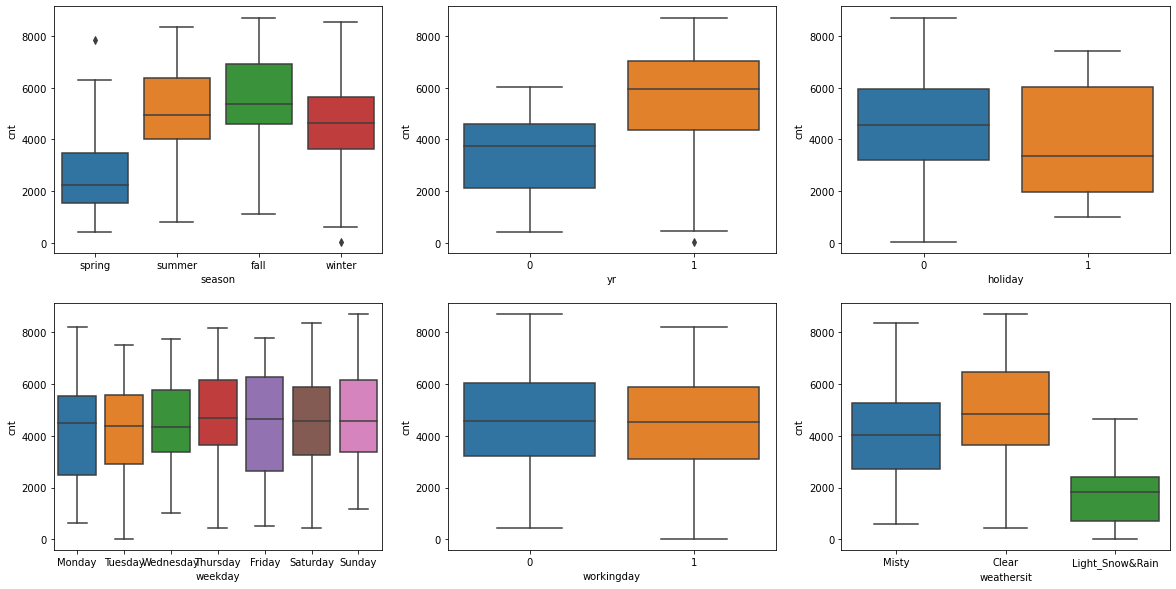

In [244]:
cat_var =['season','yr','holiday','weekday','workingday','weathersit']
boxplot_cat_col(cat_var)

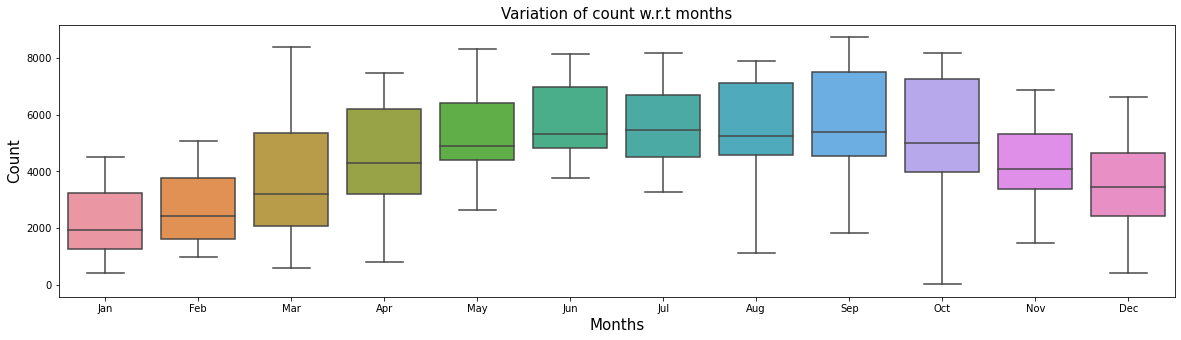

In [245]:
plt.figure(figsize=(20,5))
sns.boxplot(x=data.mnth,y=data.cnt,data=data).set_title("Variation of count w.r.t months",fontsize=15)
plt.xlabel("Months", fontsize = 15) 
plt.ylabel("Count", fontsize = 15)
plt.show()

### Analyzing the data using the bar plot

In [246]:
def barplot_cat_col(cat_var):
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    sns.barplot(cat_var,'cnt',data=data)
    plt.subplot(1,2,2)
    sns.barplot(cat_var,'cnt',hue='yr',data=data,palette='Paired')
    plt.legend(labels=['2018','2019'])
    return

In [247]:
cat_var2=['season','mnth','holiday','weekday','workingday','weathersit']

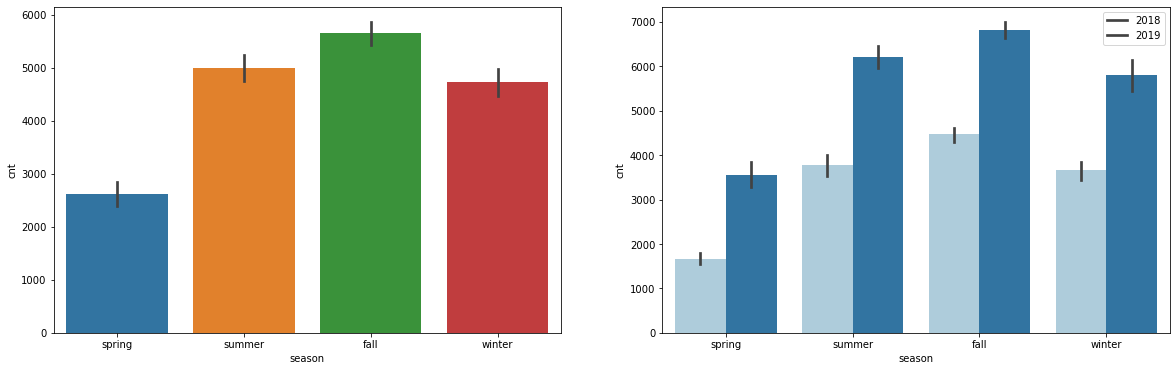

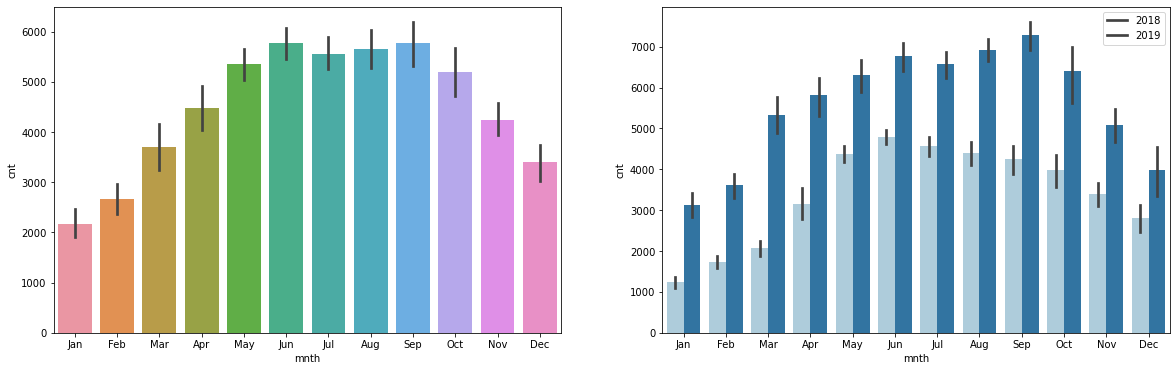

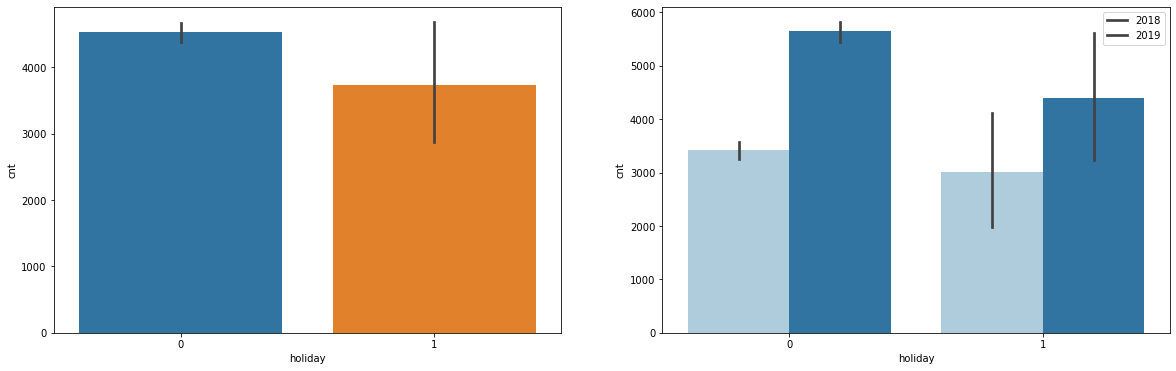

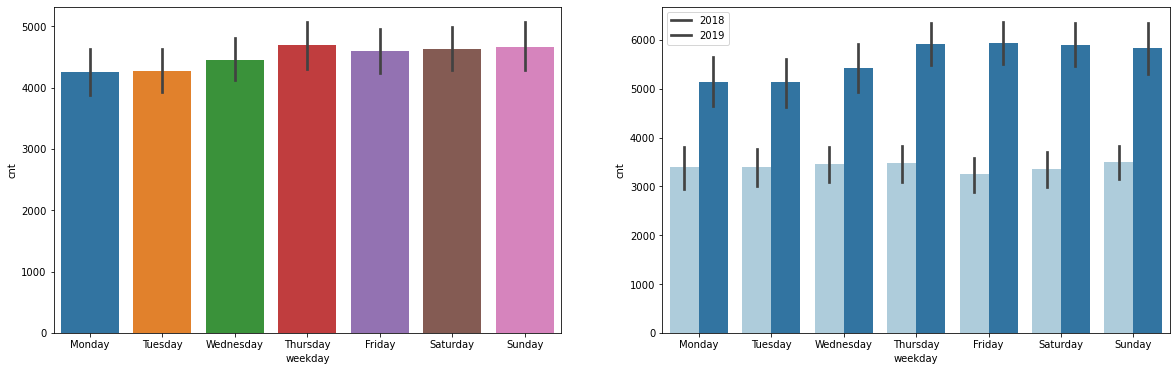

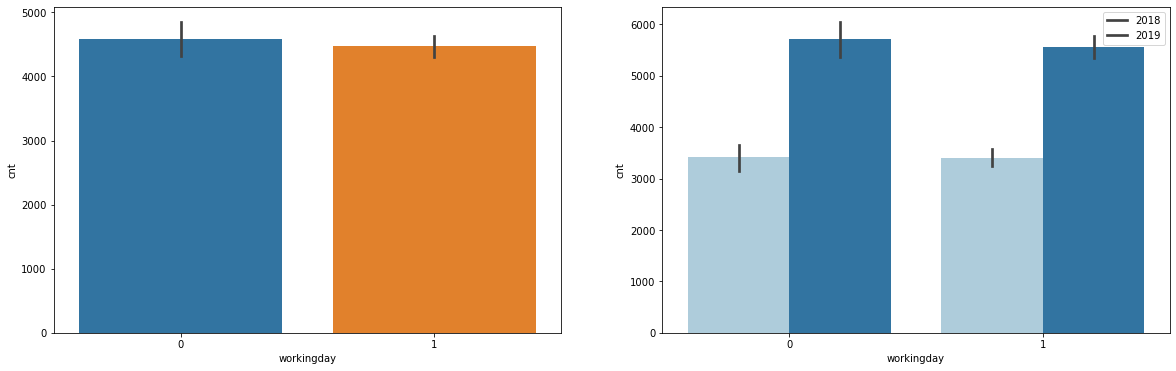

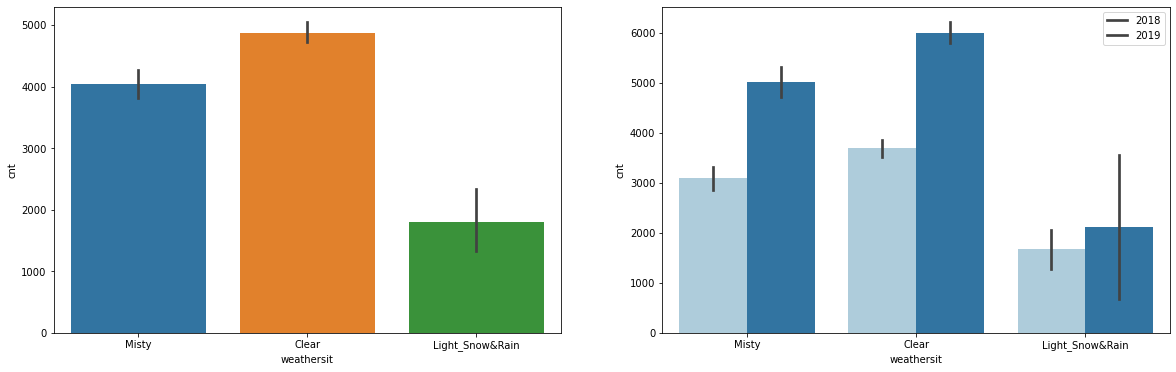

In [248]:
for i in cat_var2:
    barplot_cat_col(i)

### The following observations were made during the analysis of categorical variables:
1.	Bike demand is more in 2019 as compared to 2018
2.	Bike demand is highest during the fall season and lowest during the spring season
3.	During clear weather, the bike demand was the most and during light snow and rain, it was the least.
4.	Bike demand is high between May to October and starts decreasing from November onwards. Bike demand is the lowest in January month.
5.	There is not much difference between the bike demand during holidays/weekends and working days with demands during the working day being just slightly higher.
6.	The bike demand throughout the week remains almost similar.

## Numerical Variable Analysis

In [249]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Monday,1,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tuesday,1,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [250]:
num_var=['temp','atemp','hum','windspeed','cnt']

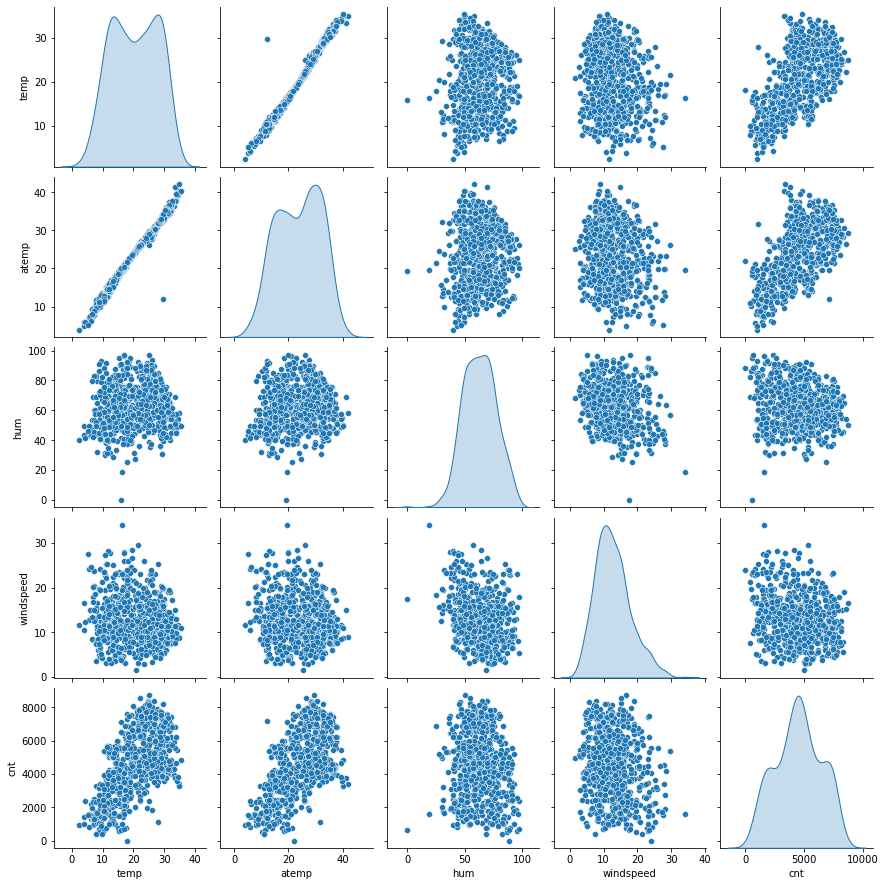

In [251]:
sns.pairplot(data[num_var],diag_kind='kde')
plt.show()

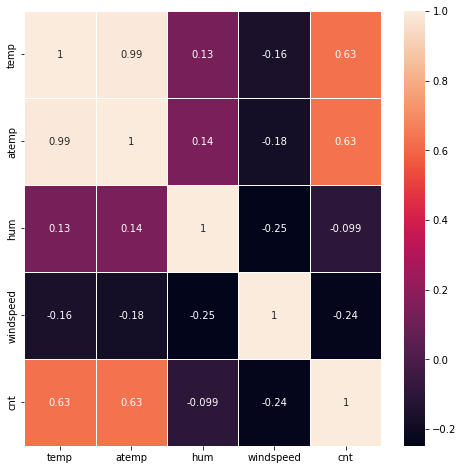

In [252]:
plt.figure(figsize=(8,8))
sns.heatmap(data[num_var].corr(),annot=True,linewidth=1)
plt.show()

#### *temp and atemp variable has the highest correlation with the target variable. Also, temp and atemp are very very highly correlated to each other so  one variable needs to be dropped out of them*

## Creating the Dummy Variables for season,month,weekday and weathersit

In [253]:
seasons=pd.get_dummies(data.season, drop_first =True)
month=pd.get_dummies(data.mnth, drop_first=True)
weekdays=pd.get_dummies(data.weekday,drop_first=True)
weather=pd.get_dummies(data.weathersit,drop_first=True)

In [254]:
data=pd.concat([seasons,month,weekdays,weather,data],axis=1)

In [255]:
data.head()

,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow&Rain,Misty,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,01-01-2018,spring,0,Jan,0,Monday,1,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,02-01-2018,spring,0,Jan,0,Tuesday,1,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,03-01-2018,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4,04-01-2018,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,05-01-2018,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [256]:
pd.set_option('display.max_columns', 500)

In [257]:
data.head()

,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow&Rain,Misty,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,01-01-2018,spring,0,Jan,0,Monday,1,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,02-01-2018,spring,0,Jan,0,Tuesday,1,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,03-01-2018,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4,04-01-2018,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,05-01-2018,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Dropping the columns

In [258]:
data.drop(['instant','dteday','season','mnth','weekday','weathersit','casual','registered','atemp'],axis=1,inplace=True)

In [259]:
data.head()

,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow&Rain,Misty,yr,holiday,workingday,temp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [260]:
data.shape

(730, 29)

In [261]:
data.describe()

,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow&Rain,Misty,yr,holiday,workingday,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.246575,0.252055,0.243836,0.084932,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466,0.028767,0.336986,0.500000,0.028767,0.690411,20.319259,62.765175,12.763620,4508.006849
std,0.431313,0.434490,0.429689,0.278971,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767,0.167266,0.473004,0.500343,0.167266,0.462641,7.506729,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000


## Checking the correlation between the different variables

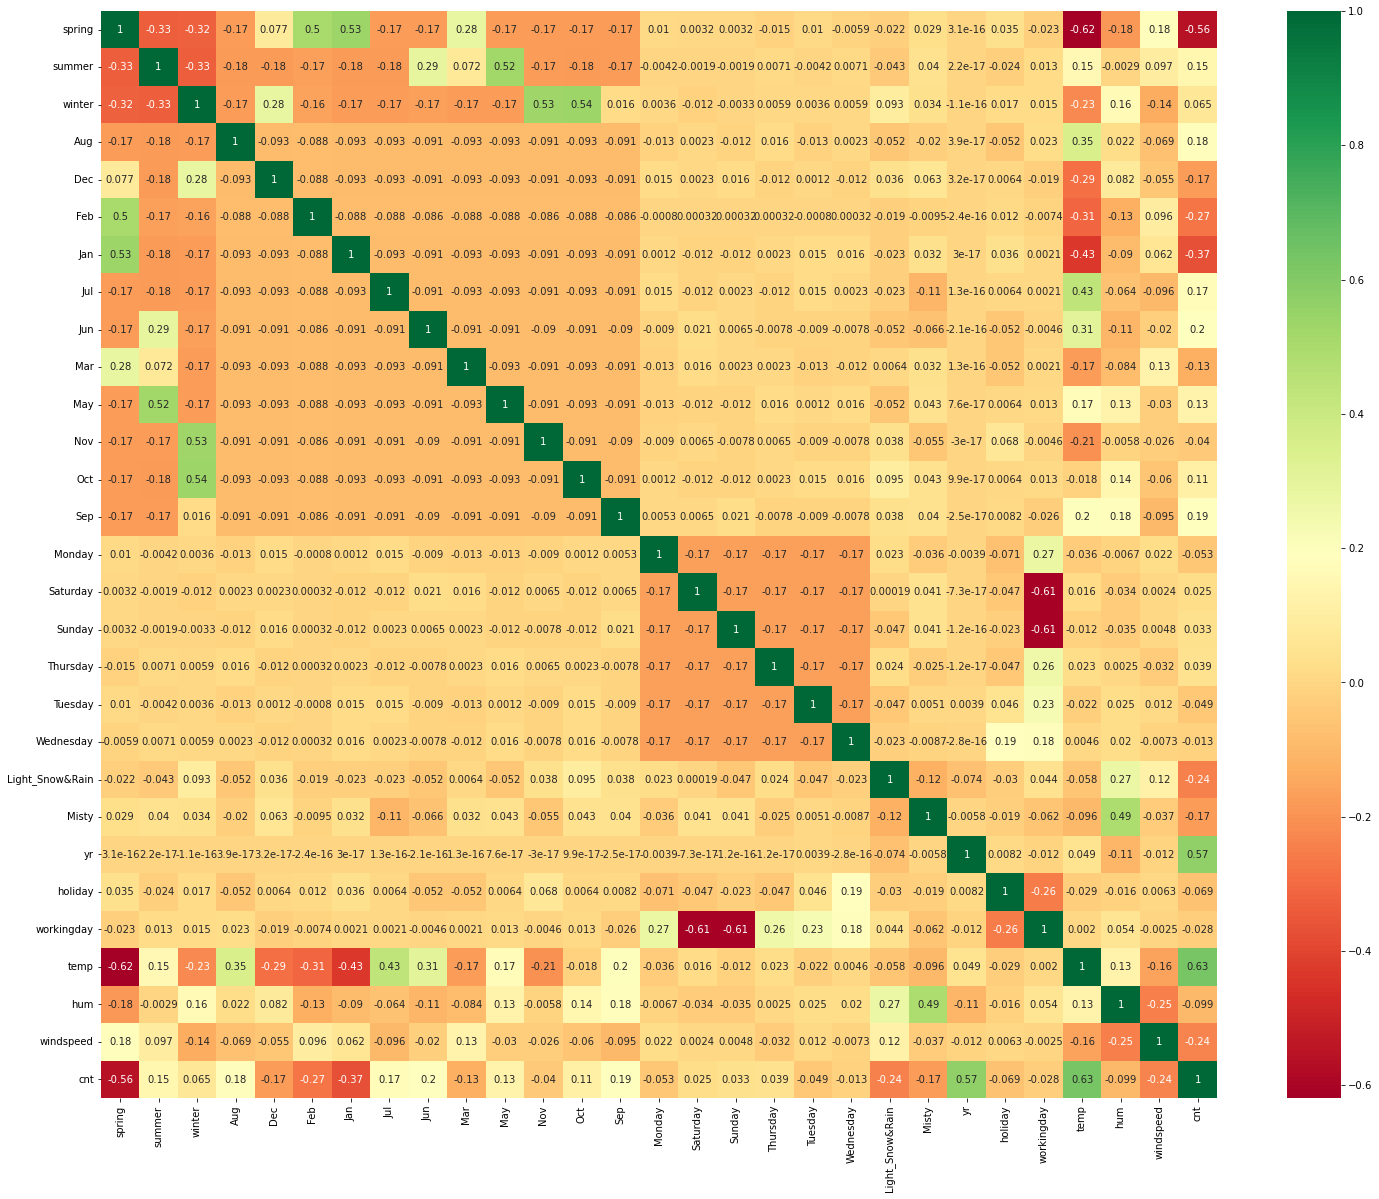

In [262]:
plt.figure(figsize=(25,20))
sns.heatmap(data.corr(),cmap='RdYlGn',annot=True)
plt.show()

## Observation
- spring and cnt are highly negatively correlated
- temp and atemp are very very highly correlated to each other
- temp and cnt are highly correlated
- different months and weather are also correlated
- Misty weather and humidity are also correlated


<Figure size 2880x432 with 0 Axes>

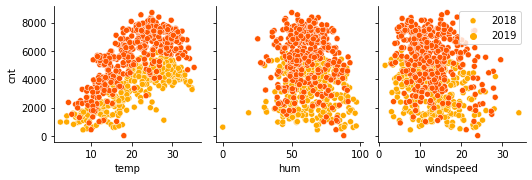

In [263]:
plt.figure(figsize = (40,6))
ax = sns.pairplot(x_vars=['temp','hum', 'windspeed'], y_vars=['cnt'] , data=data, hue='yr', palette='autumn_r')
ax._legend.remove()
plt.legend(labels=['2018', '2019'])
plt.show()

## Splitting the data into train and test set

In [264]:
from sklearn.model_selection import train_test_split

In [265]:
data_train,data_test=train_test_split(data,train_size=0.70, random_state=100)

### Checking the train and test shape

In [266]:
data_train.shape

(510, 29)

In [267]:
data_test.shape

(220, 29)

In [268]:
data.shape

(730, 29)

## Rescaling the train data

In [269]:
from sklearn.preprocessing import MinMaxScaler

In [270]:
scaler=MinMaxScaler()

In [271]:
data.head()

,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow&Rain,Misty,yr,holiday,workingday,temp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [272]:
scal_var=['temp','hum','windspeed','cnt']
data_train[scal_var]=scaler.fit_transform(data_train[scal_var])

In [273]:
data_train.describe()

,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow&Rain,Misty,yr,holiday,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499
std,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model Building

In [274]:
y_train=data_train.pop('cnt')

In [275]:
data_train.head()

,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow&Rain,Misty,yr,holiday,workingday,temp,hum,windspeed
576,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0.815169,0.725633,0.264686
426,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0.442393,0.640189,0.255342
728,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.245101,0.498067,0.663106
482,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0.395666,0.504508,0.188475
111,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0.345824,0.751824,0.380981


In [276]:
X_train=data_train

In [277]:
X_train.head()

,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow&Rain,Misty,yr,holiday,workingday,temp,hum,windspeed
576,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0.815169,0.725633,0.264686
426,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0.442393,0.640189,0.255342
728,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.245101,0.498067,0.663106
482,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0.395666,0.504508,0.188475
111,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0.345824,0.751824,0.380981


In [278]:
X_train.shape

(510, 28)

## Checking model with all the variables

In [279]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [280]:
X_train_lm=sm.add_constant(X_train)

LR=sm.OLS(y_train,X_train_lm).fit()

LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     97.49
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          1.34e-178
Time:                        23:49:44   Log-Likelihood:                 522.99
No. Observations:                 510   AIC:                            -988.0
Df Residuals:                     481   BIC:                            -865.2
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3912      0.085      4.594      0.000       0.224       0.558
spring             -0.0404      0.030     -1.335      0.182      -0.100       0.019
summer              0.0464      0.026      1.761      0.079      -0.005       0.098
winter              0.1126      0.028      3.994      0.000       0.057       0.168
Aug                 0.0273      0.034      0.806      0.421      -0.039       0.094
Dec                -0.0444      0.034     -1.309      0.191      -0.111       0.022
Feb                -0.0374      0.033     -1.123      0.262      -0.103       0.028
Jan                -0.0642      0.034     -1.894      0.059      -0.131       0.002
Jul                -0.0285      0.035     -0.808      0.420      -0.098       0.041
Jun                 0.0084      0.025      0.336      0.737      -0.041       0.058
Mar                 0.0008      0.025      0.032      0.974      -0.048       0.050
May                 0.0247      0.021      1.164      0.245      -0.017       0.066
Nov                -0.0396      0.037     -1.077      0.282      -0.112       0.033
Oct                 0.0056      0.036      0.156      0.876      -0.066       0.077
Sep                 0.0908      0.032      2.822      0.005       0.028       0.154
Monday             -0.0246      0.015     -1.687      0.092      -0.053       0.004
Saturday           -0.0557      0.072     -0.777      0.437      -0.197       0.085
Sunday             -0.0495      0.072     -0.691      0.490      -0.190       0.091
Thursday            0.0042      0.015      0.282      0.778      -0.025       0.034
Tuesday            -0.0261      0.015     -1.774      0.077      -0.055       0.003
Wednesday          -0.0102      0.015     -0.669      0.504      -0.040       0.020
Light_Snow&Rain    -0.2499      0.027     -9.380      0.000      -0.302      -0.198
Misty              -0.0578      0.011     -5.495      0.000      -0.079      -0.037
yr                  0.2311      0.008     28.384      0.000       0.215       0.247
holiday            -0.1348      0.065     -2.059      0.040      -0.263      -0.006
workingday         -0.0600      0.071     -0.844      0.399      -0.200       0.080
temp                0.4405      0.047      9.412      0.000       0.349       0.532
hum                -0.1574      0.039     -4.043      0.000      -0.234      -0.081
windspeed          -0.1825      0.026     -7.003      0.000      -0.234      -0.131
==============================================================================
Omnibus:                       78.047   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.442
Skew:                          -0.762   Prob(JB):                     2.45e-45
Kurtosis:                       5.710   Cond. No.                         70.4


## Using Recursive Feature Elimination to select 15 best variables

In [281]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [282]:
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(estimator=lm,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [283]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Monday', False, 7),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 13),
 ('Tuesday', False, 6),
 ('Wednesday', False, 10),
 ('Light_Snow&Rain', True, 1),
 ('Misty', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [284]:
col = X_train.columns[rfe.support_]
col

Index(['spring', 'summer', 'winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep',
       'Light_Snow&Rain', 'Misty', 'yr', 'holiday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [285]:
X_train.columns[~rfe.support_]

Index(['Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'workingday'],
      dtype='object')

In [286]:
X_train_rfe = X_train[col]

In [287]:
X_train_rfe.head()

,spring,summer,winter,Dec,Jan,Jul,Nov,Sep,Light_Snow&Rain,Misty,yr,holiday,temp,hum,windspeed
576,0,0,0,0,0,1,0,0,0,0,1,0,0.815169,0.725633,0.264686
426,1,0,0,0,0,0,0,0,0,1,1,0,0.442393,0.640189,0.255342
728,1,0,0,1,0,0,0,0,0,0,1,0,0.245101,0.498067,0.663106
482,0,1,0,0,0,0,0,0,0,1,1,0,0.395666,0.504508,0.188475
111,0,1,0,0,0,0,0,0,0,1,0,0,0.345824,0.751824,0.380981


In [288]:
X_train_rfe.shape

(510, 15)

## Model Development using Statsmodel

In [289]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [290]:
X_train_rfe=sm.add_constant(X_train_rfe)

In [291]:
X_train_rfe.head()

,const,spring,summer,winter,Dec,Jan,Jul,Nov,Sep,Light_Snow&Rain,Misty,yr,holiday,temp,hum,windspeed
576,1.0,0,0,0,0,0,1,0,0,0,0,1,0,0.815169,0.725633,0.264686
426,1.0,1,0,0,0,0,0,0,0,0,1,1,0,0.442393,0.640189,0.255342
728,1.0,1,0,0,1,0,0,0,0,0,0,1,0,0.245101,0.498067,0.663106
482,1.0,0,1,0,0,0,0,0,0,0,1,1,0,0.395666,0.504508,0.188475
111,1.0,0,1,0,0,0,0,0,0,0,1,0,0,0.345824,0.751824,0.380981


In [292]:
# Creating the VIF function
def VIF(df):
    vif=pd.DataFrame()
    vif['Features']=df.columns
    vif['VIF']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending=False)
    return vif

In [293]:
VIF(X_train_rfe)

,Features,VIF
0,const,82.52
1,spring,5.27
13,temp,4.42
3,winter,3.83
2,summer,2.77
14,hum,1.92
7,Nov,1.77
5,Jan,1.68
10,Misty,1.57
4,Dec,1.50


### Model1

In [294]:
X_train_lm=sm.add_constant(X_train_rfe)

LR1=sm.OLS(y_train,X_train_lm).fit()

LR1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          8.15e-189
Time:                        23:49:44   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3197      0.036      8.859      0.000       0.249       0.391
spring             -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer              0.0423      0.015      2.761      0.006       0.012       0.072
winter              0.1019      0.018      5.656      0.000       0.067       0.137
Dec                -0.0355      0.018     -2.024      0.043      -0.070      -0.001
Jan                -0.0434      0.018     -2.393      0.017      -0.079      -0.008
Jul                -0.0553      0.018     -3.030      0.003      -0.091      -0.019
Nov                -0.0387      0.019     -2.057      0.040      -0.076      -0.002
Sep                 0.0755      0.017      4.466      0.000       0.042       0.109
Light_Snow&Rain    -0.2465      0.026     -9.331      0.000      -0.298      -0.195
Misty              -0.0543      0.010     -5.194      0.000      -0.075      -0.034
yr                  0.2304      0.008     28.487      0.000       0.215       0.246
holiday            -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp                0.4815      0.037     13.005      0.000       0.409       0.554
hum                -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed          -0.1887      0.026     -7.315      0.000      -0.239      -0.138
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [295]:
VIF(X_train_lm)

,Features,VIF
0,const,82.52
1,spring,5.27
13,temp,4.42
3,winter,3.83
2,summer,2.77
14,hum,1.92
7,Nov,1.77
5,Jan,1.68
10,Misty,1.57
4,Dec,1.50


### Model2

In [296]:
# Dropping Dec column as it has high P Value and VIF
X_train_lm=X_train_lm.drop(['Dec'],axis=1)

In [297]:
X_train_lm=sm.add_constant(X_train_lm)

LR2=sm.OLS(y_train,X_train_lm).fit()

LR2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          4.41e-189
Time:                        23:49:44   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3032      0.035      8.598      0.000       0.234       0.373
spring             -0.0562      0.021     -2.652      0.008      -0.098      -0.015
summer              0.0479      0.015      3.168      0.002       0.018       0.078
winter              0.0972      0.018      5.421      0.000       0.062       0.132
Jan                -0.0341      0.018     -1.936      0.053      -0.069       0.001
Jul                -0.0559      0.018     -3.057      0.002      -0.092      -0.020
Nov                -0.0236      0.017     -1.362      0.174      -0.058       0.010
Sep                 0.0802      0.017      4.775      0.000       0.047       0.113
Light_Snow&Rain    -0.2404      0.026     -9.131      0.000      -0.292      -0.189
Misty              -0.0528      0.010     -5.047      0.000      -0.073      -0.032
yr                  0.2302      0.008     28.371      0.000       0.214       0.246
holiday            -0.0920      0.026     -3.582      0.000      -0.142      -0.042
temp                0.5055      0.035     14.369      0.000       0.436       0.575
hum                -0.1697      0.038     -4.497      0.000      -0.244      -0.096
windspeed          -0.1858      0.026     -7.190      0.000      -0.237      -0.135
==============================================================================
Omnibus:                       60.634   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.746
Skew:                          -0.640   Prob(JB):                     7.44e-31
Kurtosis:                       5.211   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [298]:
VIF(X_train_lm)

,Features,VIF
0,const,78.35
1,spring,5.20
12,temp,3.97
3,winter,3.76
2,summer,2.68
13,hum,1.90
4,Jan,1.57
9,Misty,1.56
5,Jul,1.49
6,Nov,1.49


### Model3

In [299]:
# Dropping Nov as it has high P Value
X_train_lm=X_train_lm.drop(['Nov'],axis=1)

In [300]:
X_train_lm=sm.add_constant(X_train_lm)

LR3=sm.OLS(y_train,X_train_lm).fit()

LR3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          7.59e-190
Time:                        23:49:44   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2964      0.035      8.483      0.000       0.228       0.365
spring             -0.0519      0.021     -2.476      0.014      -0.093      -0.011
summer              0.0502      0.015      3.336      0.001       0.021       0.080
winter              0.0919      0.018      5.247      0.000       0.057       0.126
Jan                -0.0333      0.018     -1.892      0.059      -0.068       0.001
Jul                -0.0556      0.018     -3.039      0.003      -0.092      -0.020
Sep                 0.0827      0.017      4.951      0.000       0.050       0.116
Light_Snow&Rain    -0.2392      0.026     -9.084      0.000      -0.291      -0.187
Misty              -0.0526      0.010     -5.025      0.000      -0.073      -0.032
yr                  0.2301      0.008     28.339      0.000       0.214       0.246
holiday            -0.0963      0.026     -3.773      0.000      -0.146      -0.046
temp                0.5124      0.035     14.706      0.000       0.444       0.581
hum                -0.1681      0.038     -4.452      0.000      -0.242      -0.094
windspeed          -0.1874      0.026     -7.253      0.000      -0.238      -0.137
==============================================================================
Omnibus:                       58.633   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.919
Skew:                          -0.626   Prob(JB):                     2.26e-29
Kurtosis:                       5.154   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [301]:
VIF(X_train_lm)

,Features,VIF
0,const,76.76
1,spring,5.08
11,temp,3.89
3,winter,3.59
2,summer,2.65
12,hum,1.90
4,Jan,1.57
8,Misty,1.56
5,Jul,1.49
6,Sep,1.30


### Model4

In [302]:
# Dropping the Jan Column as it has high P Value
X_train_lm=X_train_lm.drop(['Jan'],axis=1)

In [303]:
X_train_lm=sm.add_constant(X_train_lm)

LR4=sm.OLS(y_train,X_train_lm).fit()

LR4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          2.95e-190
Time:                        23:49:44   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2848      0.034      8.258      0.000       0.217       0.353
spring             -0.0564      0.021     -2.700      0.007      -0.097      -0.015
summer              0.0531      0.015      3.536      0.000       0.024       0.083
winter              0.0976      0.017      5.643      0.000       0.064       0.132
Jul                -0.0572      0.018     -3.123      0.002      -0.093      -0.021
Sep                 0.0833      0.017      4.973      0.000       0.050       0.116
Light_Snow&Rain    -0.2369      0.026     -8.983      0.000      -0.289      -0.185
Misty              -0.0527      0.010     -5.017      0.000      -0.073      -0.032
yr                  0.2294      0.008     28.208      0.000       0.213       0.245
holiday            -0.0969      0.026     -3.787      0.000      -0.147      -0.047
temp                0.5299      0.034     15.728      0.000       0.464       0.596
hum                -0.1726      0.038     -4.569      0.000      -0.247      -0.098
windspeed          -0.1822      0.026     -7.074      0.000      -0.233      -0.132
==============================================================================
Omnibus:                       57.486   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.221
Skew:                          -0.612   Prob(JB):                     5.28e-29
Kurtosis:                       5.151   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [304]:
VIF(X_train_lm)

,Features,VIF
0,const,74.37
1,spring,5.02
10,temp,3.61
3,winter,3.48
2,summer,2.62
11,hum,1.89
7,Misty,1.56
4,Jul,1.48
5,Sep,1.30
6,Light_Snow&Rain,1.24


### Model5

In [305]:
# Dropping the spring column as it has high P value
X_train_lm=X_train_lm.drop(['spring'],axis=1)

In [306]:
X_train_lm=sm.add_constant(X_train_lm)

LR5=sm.OLS(y_train,X_train_lm).fit()

LR5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.0
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          6.89e-190
Time:                        23:49:44   Log-Likelihood:                 505.58
No. Observations:                 510   AIC:                            -987.2
Df Residuals:                     498   BIC:                            -936.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2262      0.027      8.384      0.000       0.173       0.279
summer              0.0815      0.011      7.580      0.000       0.060       0.103
winter              0.1347      0.011     12.732      0.000       0.114       0.155
Jul                -0.0478      0.018     -2.640      0.009      -0.083      -0.012
Sep                 0.0962      0.016      5.957      0.000       0.064       0.128
Light_Snow&Rain    -0.2318      0.026     -8.757      0.000      -0.284      -0.180
Misty              -0.0502      0.011     -4.771      0.000      -0.071      -0.030
yr                  0.2280      0.008     27.917      0.000       0.212       0.244
holiday            -0.0989      0.026     -3.844      0.000      -0.149      -0.048
temp                0.5977      0.023     26.494      0.000       0.553       0.642
hum                -0.1841      0.038     -4.876      0.000      -0.258      -0.110
windspeed          -0.1895      0.026     -7.351      0.000      -0.240      -0.139
==============================================================================
Omnibus:                       52.291   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.838
Skew:                          -0.600   Prob(JB):                     1.72e-23
Kurtosis:                       4.869   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [307]:
VIF(X_train_lm)

,Features,VIF
0,const,44.97
10,hum,1.87
9,temp,1.60
6,Misty,1.55
3,Jul,1.43
1,summer,1.33
2,winter,1.29
5,Light_Snow&Rain,1.24
4,Sep,1.19
11,windspeed,1.18


### *Model5 is the final model as it has low multicollinearity between the predictor variables and the p-values for all the predictors is also low.*

In [308]:
# Checking all the intercept value and all the model coefficients
LR5.params

const              0.226223
summer             0.081529
winter             0.134695
Jul               -0.047814
Sep                0.096174
Light_Snow&Rain   -0.231830
Misty             -0.050192
yr                 0.227954
holiday           -0.098909
temp               0.597749
hum               -0.184135
windspeed         -0.189481
dtype: float64

### Best Fitted model equation
cnt=0.226223+(0.081529 * summer)+(0.134695 * winter)-(0.047814 * Jul)+(0.096174 * (Sep)-(0.231830 * Light_Snow&Rain)-(0.050192 * Misty)+(0.227954 * yr)-(0.098909 * holiday)+(0.597749 * temp)-(0.184135 * hum)-(0.189481 * windspeed)

## Interpretation of the coefficiants

1. const: The Constant value of ‘0.226223’ indicated that, in the absence of all other predictor variables,The bike demand can still increase by 0.226223 units.
2. summer: A coefficient value of ‘0.081529’ indicated that a unit increase in Summer variable increase the bike demand by 0.081529 units.
3. winter: A coefficient value of ‘0.134695’ indicated that a unit increase in Winter variable increases the bike demand by 0.134695 units.
4. Jul: A coefficient value of ‘-0.047814’ indicated that a unit increase in Jul variable, decrease the bike demand by 0.047814 units.
5. Sep: A coefficient value of ‘0.096174’ indicated that, a unit increase in Sep variable increases the bike demand by 0.096174 units.
6. Light_Snow&Rain: A coefficient value of ‘-0.231830’ indicated that a unit increase in Light_Snow&Rain variable, decreases the bike demand by 0.231830 units.
7. Misty: A coefficient value of ‘-0.050192’ indicated that, a unit increase in Misty variable decreases the bike demand by 0.050192 units.
8. yr: A coefficient value of ‘0.227954’ indicated that a unit increase in yr variable increases the bike demand by 0.227954 units.
9. holiday: A coefficient value of ‘-0.098909’ indicated that, a unit increase in holiday variable, decreases the bike demand by 0.098909 units.
10. temp: A coefficient value of ‘0.597749’ indicated that a unit increase in temp variable, increases the bike demand by 0.597749 units.
11. hum: A coefficient value of ‘-0.184135’ indicated that a unit increase in humidity variable decreases the bike demand by 0.184135 units.
12. windspeed: A coefficient value of ‘-0.189481’ indicated that a unit increase in windspeed variable decreases the bike demand by 0.189481 units

## Residual Analysis of the Train Data

In [309]:
y_train_pred=LR5.predict(X_train_lm)

In [310]:
residuals=y_train-y_train_pred

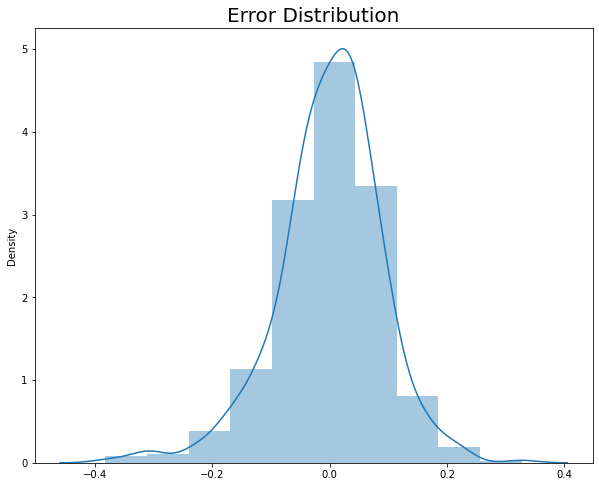

In [311]:
plt.figure(figsize=[10,8])
sns.distplot(residuals,bins=10)
plt.title('Error Distribution',fontsize=20)
plt.show()

#### *From the above plot, we can conclude that the errors are normally distributed*

## Prediction based on Final Model

In [312]:
data_test.head()

,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow&Rain,Misty,yr,holiday,workingday,temp,hum,windspeed,cnt
184,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,29.793347,63.7917,5.459106,6043
535,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,32.082500,59.2083,7.625404,6211
299,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,19.270000,81.2917,13.250121,2659
221,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,31.433347,42.4167,13.417286,4780
152,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,29.315000,30.5000,19.583229,4968


In [313]:
data_test.shape

(220, 29)

In [314]:
test_num_vars=['temp','hum','windspeed','cnt']
data_test[test_num_vars]=scaler.transform(data_test[test_num_vars])
data_test.head()

,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow&Rain,Misty,yr,holiday,workingday,temp,hum,windspeed,cnt
184,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0.511964,0.837699,0.334206,0.303382
221,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.817246,0.314298,0.537414,0.569029


### Dividing X_test and y_test

In [315]:
y_test=data_test.pop('cnt')
X_test=data_test

In [316]:
X_test

,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow&Rain,Misty,yr,holiday,workingday,temp,hum,windspeed
184,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0.831783,0.657364,0.084219
535,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0.901354,0.610133,0.153728
299,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0.511964,0.837699,0.334206
221,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.881625,0.437098,0.339570
152,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.817246,0.314298,0.537414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0.519232,0.756118,0.283397
127,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.584649,0.650923,0.069510
640,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0.745598,0.817947,0.052115
72,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.331557,0.512107,0.203418


In [317]:
y_test

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
702    0.757478
127    0.495973
640    0.868615
72     0.232858
653    0.864243
Name: cnt, Length: 220, dtype: float64

In [318]:
X_train_lm

,const,summer,winter,Jul,Sep,Light_Snow&Rain,Misty,yr,holiday,temp,hum,windspeed
576,1.0,0,0,1,0,0,0,1,0,0.815169,0.725633,0.264686
426,1.0,0,0,0,0,0,1,1,0,0.442393,0.640189,0.255342
728,1.0,0,0,0,0,0,0,1,0,0.245101,0.498067,0.663106
482,1.0,1,0,0,0,0,1,1,0,0.395666,0.504508,0.188475
111,1.0,1,0,0,0,0,1,0,0,0.345824,0.751824,0.380981
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0,0,0,0,0,0,1,0,0.863973,0.679690,0.187140
53,1.0,0,0,0,0,0,0,0,0,0.202618,0.435939,0.111379
350,1.0,0,1,0,0,0,1,0,0,0.248216,0.577930,0.431816
79,1.0,1,0,0,0,0,1,0,0,0.462664,0.759870,0.529881


In [319]:
X_train_lm=X_train_lm.drop(['const'],axis=1)

In [320]:
columns=X_train_lm.columns

In [321]:
columns

Index(['summer', 'winter', 'Jul', 'Sep', 'Light_Snow&Rain', 'Misty', 'yr',
       'holiday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [322]:
X_test=X_test[columns]

In [323]:
X_test.head()

,summer,winter,Jul,Sep,Light_Snow&Rain,Misty,yr,holiday,temp,hum,windspeed
184,0,0,1,0,0,1,0,1,0.831783,0.657364,0.084219
535,1,0,0,0,0,0,1,0,0.901354,0.610133,0.153728
299,0,1,0,0,0,1,0,0,0.511964,0.837699,0.334206
221,0,0,0,0,0,0,0,0,0.881625,0.437098,0.339570
152,1,0,0,0,0,0,0,0,0.817246,0.314298,0.537414


In [324]:
X_test_lm=sm.add_constant(X_test)

In [325]:
y_test_pred=LR5.predict(X_test_lm)

In [326]:
LR5.params

const              0.226223
summer             0.081529
winter             0.134695
Jul               -0.047814
Sep                0.096174
Light_Snow&Rain   -0.231830
Misty             -0.050192
yr                 0.227954
holiday           -0.098909
temp               0.597749
hum               -0.184135
windspeed         -0.189481
dtype: float64

## Model Evaluation

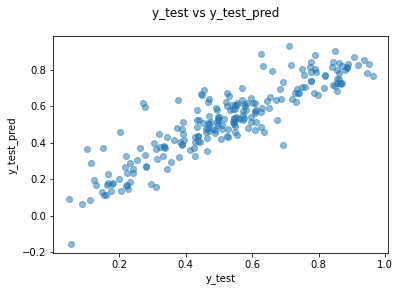

In [327]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred,alpha = 0.5)
fig.suptitle('y_test vs y_test_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_test_pred')
plt.show()

## R-square Value

In [328]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_test_pred)
r2

0.8050021066128354

## Adjusted R-Square Value

In [329]:
n = X_test.shape[0]
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round((1-(1-r2)*(n-1)/(n-p-1)),4)
adjusted_r2

0.7947

### *R-square value and Adjusted R-square of the test dataset is near to the train dataset which had the value of 0.840 and 0.836 respectively.*

## RMSE Value

In [330]:
from math import sqrt
from sklearn.metrics import mean_squared_error
RMSE = round(sqrt(mean_squared_error(y_test, y_test_pred)),4)
RMSE

0.0966

## MAE Value

In [331]:
from sklearn.metrics import mean_absolute_error
MAE = round(mean_absolute_error(y_test, y_test_pred),4)
MAE

0.0719

### *Both the RMSE and MAE value of the test set is quite low as preferred.*

### Based on the model, the variables which are influencing the bike bookings are:

1. Temperature(temp): It is evident from the model that customers prefer warm and pleasant temperature for bike booking.

2. Year(yr):There was significant rise in bike demand in 2019 as compared to 2018. It is also expected that post covid, the demand for bikes will also increase.

3. Season(season): The bike demand was more during the Summer and Fall season, hence, a good number of bikes should be available during this time as compared to Winter and Spring.

4. Weather(weathersit): It seems that customers avoided renting bikes during light snow and rain and preferred clear weather.

# Thank You!